In [1]:
from fullshape.pk_full_shape import *
import matplotlib.pyplot as plt

In [2]:
# Define value of nuisance parameters
b1 = 2.
sigma_v = 0.
sigma_per = 10.
sigma_par = 10.

In [3]:
# Initiate anisotropic pk calculator
pk_calc = PK_Calculator(minkh=1e-5, maxkh = 0.5, num_k = 50)

In [4]:
# Set a cosmology
pk_calc.set_cosmology(As=2.142e-9, ns=0.9667, H0=67.36, ombh2=0.02230, 
                            omch2=0.1188, mnu=0.06, omk=0, tau=0.06)

In [5]:
# Calculate anisotropic pk
pk_calc.get_anisotropic_pk(sigma_per, sigma_par, b1, sigma_v)

In [6]:
# Generate a noisy realisation
pk_noisy, cov = pk_calc.generate_noisy(nave = 1e-4, vol = 1e9)
p0_noisy, p2_noisy, p4_noisy = pk_noisy

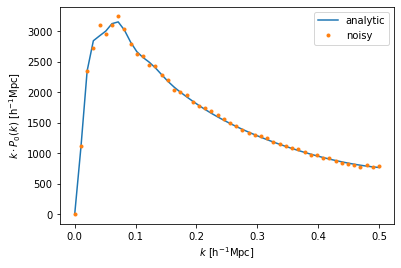

In [7]:
fig = plt.figure()
plt.plot(pk_calc.kh, pk_calc.kh*pk_calc.p0[0], label = 'analytic')
plt.plot(pk_calc.kh, pk_calc.kh*p0_noisy[0], '.', label = 'noisy')
plt.ylabel(r'$k \cdot P_0 (k) \ \mathrm{[h^{-1} Mpc]}$')
plt.xlabel(r'$k \ \mathrm{[h^{-1} Mpc]}$')
plt.legend()

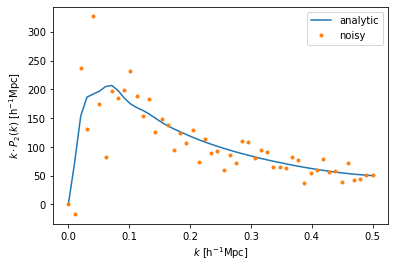

In [8]:
fig = plt.figure()
plt.plot(pk_calc.kh, pk_calc.kh*pk_calc.p2[0], label = 'analytic')
plt.plot(pk_calc.kh, pk_calc.kh*p2_noisy[0], '.', label = 'noisy')
plt.ylabel(r'$k \cdot P_2 (k) \ \mathrm{[h^{-1} Mpc]}$')
plt.xlabel(r'$k \ \mathrm{[h^{-1} Mpc]}$')
plt.legend()

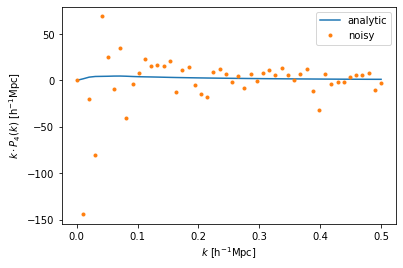

In [9]:
fig = plt.figure()
plt.plot(pk_calc.kh, pk_calc.kh*pk_calc.p4[0], label = 'analytic')
plt.plot(pk_calc.kh, pk_calc.kh*p4_noisy[0], '.', label = 'noisy')
plt.ylabel(r'$k \cdot P_4 (k) \ \mathrm{[h^{-1} Mpc]}$')
plt.xlabel(r'$k \ \mathrm{[h^{-1} Mpc]}$')
plt.legend()

In [24]:
p0, p2, p4 = np.load('./fullshape/simulated_data/pk_noisy.npy')
c = np.load('./fullshape/simulated_data/cov.npy')

In [21]:
np.concatenate([p0, p2, p4], axis = -1).shape

(1, 150)

In [23]:
pk_calc.p0.shape

(1, 50)

In [25]:
c.shape

(1, 150, 150)